Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 02 in Python

---

#### Exercise 1: Data Types
Imagine you have the following dataset:

| Date  	| City   	| Country  	| Temperature | Wind	|
|------ 	|----------	|-----------|-------------|---------|
|11.10.2022 |Konstanz   | Germany   |  17°C       | Low     |
|11.10.2022 |Chicago    | US        |  18°C       | Strong  |
|13.10.2022 |Sydney     | Australia |  11°C       | Medium  |

##### __(a) Describe for each column whether it contains nominal, ordinal or numerical data and explain why you made that decision__

```
>> Date: numerical, can be represented numerically using formats like timestamps
   City: nominal, represents categories or labels, with no quantitative relationship between categories
   Country: nominal, represents categories or labels, with no quantitative relationship between categories
   Temperature: numerical, represents a measurable quantity and can be ordered and used for mathematical operations
   Wind: ordinal, represents categories with a meaningful order, but the distance between values do not have any meaning
```

##### __(b) Give at least one mathematical operation that can be used on all three data types__

```
>> The "count" function can be performed on all three data types, which is a basic statistical operation.
```

---

#### Exercise 2: Missing Values

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_exercise2.csv')
df

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __The data contains missing values. In the following we will apply 4 different ways to deal with missing values known from the lecture.__ 

##### __(a) Drop the rows containing missing values and store your result as ``df1`` (Note: do not drop the rows in the original ``df``).__ 

In [3]:
df1 = df.dropna()
df1

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __(b) Another method is to assign a global constant to missing values. Assign ``-1`` to each missing value and store the new dataframe in ``df2``.__ 

In [4]:
df2 = df.fillna(-1)
df2

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __(c) Now fill in the missing values using the attribute mean and store it in ``df3``. Plot the result using the ``seaborn.scatterplot``method.__ 

In [5]:
df3 = df.fillna(df.mean())
df3

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


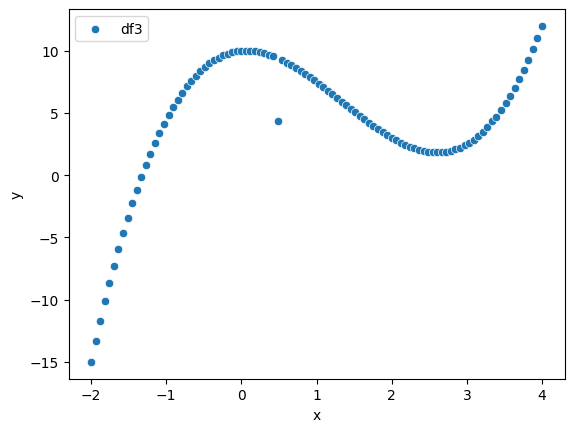

In [6]:
sns.scatterplot(data=df3, x='x', y='y', label='df3')
plt.show()

##### __(d) Instead of filling the missing values with the mean, we will now try to fill them using regression.__
##### __(d.1)What polynomial degree does the function you are looking for most likely have?__ _(Hint: Use the ``seaborn.regplot`` method and modify the ``order`` parameter)_

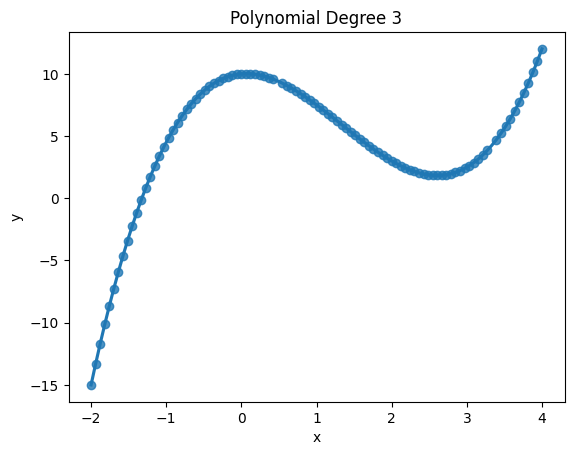

In [7]:
degree = 3
sns.regplot(data=df,x="x", y="y", order=degree)
plt.title(f'Polynomial Degree {degree}')
plt.show()

```
> Polynomial degree 3 
```

##### __(d.2) Compute the coefficients for the function that describes the data__ _(Hint: drop missing values and use ``numpy.polyfit()``)_

In [8]:
coefficients = np.polyfit(df1['x'], df1['y'], degree) # Using the dataframe with the missing vlaues dropped
print(coefficients)

[ 1.  -4.   0.5 10. ]


##### __(d.3) Use the computed polynomial coefficients to implement a regression method. Use the method to fill the missing values in the dataframe with values  and store it as ``df4``.__

In [9]:

def polynomial_reg(x, coefficients):
    result = 0
    for i in range(len(coefficients)):
        result += coefficients[i] * (x ** (len(coefficients) - i - 1))
        return result

df4 = df
missing_values = df4["y"].isnull()
df4["y"][missing_values] = polynomial_reg(df4["x"][missing_values], coefficients)
df4

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __(e) Plot all your results (dropNA, global constant, mean and polynomial regression) and compare the results. Which of the 4 methods would you use here? Explain your decision.__

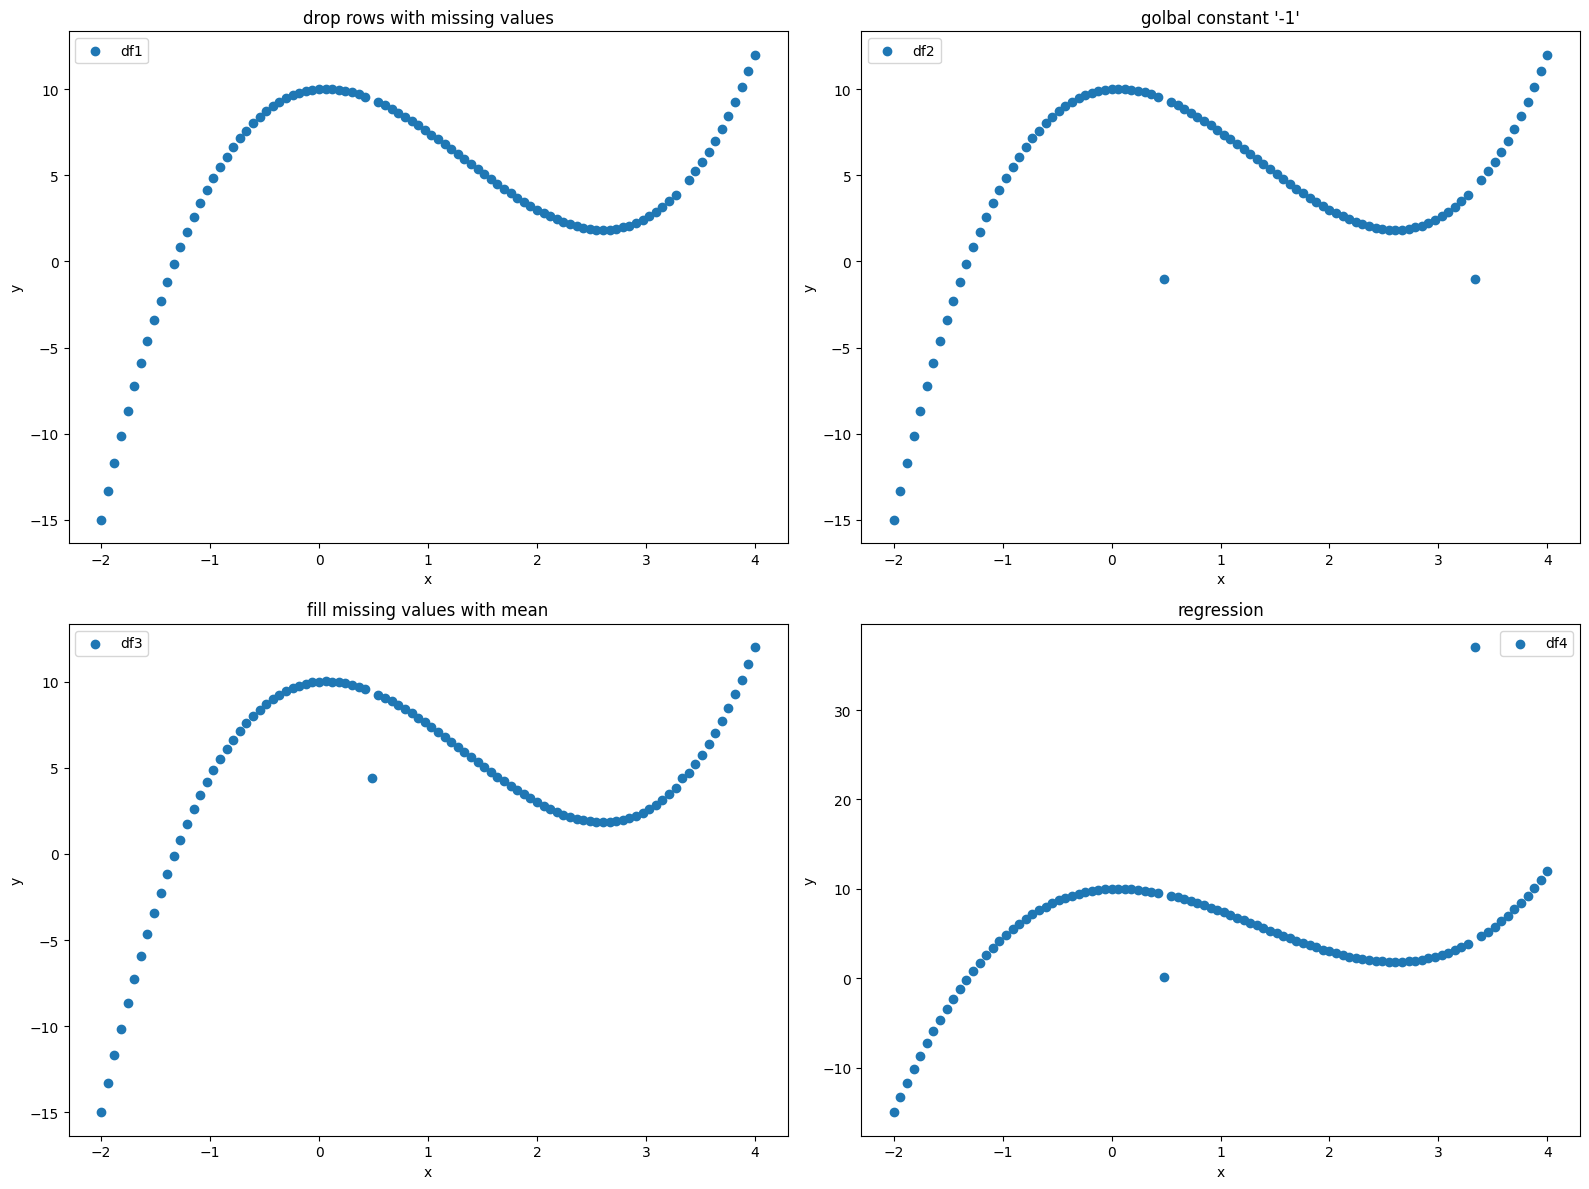

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

axes[0,0].scatter(df1["x"], df1["y"], label='df1')
axes[0,0].set_title("drop rows with missing values")

axes[0,1].scatter(df2["x"], df2["y"], label='df2')
axes[0,1].set_title("golbal constant '-1'")

axes[1,0].scatter(df3["x"], df3["y"], label='df3')
axes[1,0].set_title("fill missing values with mean")

axes[1,1].scatter(df4["x"], df4["y"], label='df4')
axes[1,1].set_title("regression")

for ax in axes.flatten():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    
plt.tight_layout()
plt.show()

```
>> In this case, I believe that "dropping the missing rows" is the most appropriate choice.
    (1) Small Portion of Dataset:
        The missing values constitute a very small portion of the dataset (2%).
        Thus dropping these rows does not result in a significant loss of information.

    (2) Potential Outliers from Other Methods:
        The other 3 methods introduce potential outliers, and these outliers may skew the analysis.

    (3) Preservation of Data Integrity:
        Choosing to drop missing values preserves the integrity of the existing data without introducing artificial values.
```

---

#### Exercise 3: Data Cleaning
Clean the following cereal dataset containing nutrition data on 80 cereal products. The commands have to work for different datasets as well. 

Careful: If you like to eat cereal, do yourself a favor and do not look at the numbers. After seeing these data it will never be the same to eat Fruity Pebbles again.

In [11]:
import pandas as pd
df = pd.read_csv('data/cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70.0,4.0,1,130.0,10.0,5.0,6,280.0,25.0,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120.0,3.0,5,15.0,2.0,8.0,8,135.0,0.0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70.0,4.0,1,260.0,9.0,7.0,5,320.0,25.0,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0,140.0,14.0,8.0,0,330.0,25.0,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8,-1.0,25.0,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1,250.0,0.0,21.0,3,60.0,25.0,3,1.0,0.75,39.106174;;
73,Trix,G,C,110.0,1.0,1,140.0,0.0,13.0,12,25.0,25.0,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100.0,3.0,1,NaN,3.0,17.0,3,115.0,25.0,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100.0,3.0,1,200.0,3.0,17.0,3,110.0,25.0,1,1.0,1.00,51.592193;;


##### __(a) Are there columns with missing values?__

In [12]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    1
protein     2
fat         0
sodium      1
fiber       0
carbo       2
sugars      0
potass      3
vitamins    1
shelf       0
weight      0
cups        2
rating;;    0
dtype: int64

##### __(b) Drop all rows that have at least three `NaN` values.__

In [13]:
df = df.dropna(thresh=df.shape[1]-2)
df.isnull().sum()

name        0
mfr         0
type        0
calories    1
protein     2
fat         0
sodium      1
fiber       0
carbo       1
sugars      0
potass      2
vitamins    1
shelf       0
weight      0
cups        1
rating;;    0
dtype: int64

In [14]:
df.shape

(76, 16)

##### __(c) Replace the `NaN` values of remaining columns with missing values using linear interpolation. Limit the maximum number of consecutive `NaN` to fill to ``1``. Are there still `NaN` values and if yes, in which column?__

In [15]:
df_interpolated = df.interpolate(limit=1)

nan_columns = df_interpolated.columns[df_interpolated.isnull().any()]

# Print the DataFrame after interpolation
print("DataFrame after linear interpolation:")
df_interpolated

DataFrame after linear interpolation:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70.0,4.0,1,130.0,10.0,5.0,6,280.0,25.0,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120.0,3.0,5,15.0,2.0,8.0,8,135.0,0.0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70.0,4.0,1,260.0,9.0,7.0,5,320.0,25.0,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0,140.0,14.0,8.0,0,330.0,25.0,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8,-1.0,25.0,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1,250.0,0.0,21.0,3,60.0,25.0,3,1.0,0.75,39.106174;;
73,Trix,G,C,110.0,1.0,1,140.0,0.0,13.0,12,25.0,25.0,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100.0,3.0,1,170.0,3.0,17.0,3,115.0,25.0,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100.0,3.0,1,200.0,3.0,17.0,3,110.0,25.0,1,1.0,1.00,51.592193;;


In [16]:
if len(nan_columns) > 0:
    print("\nColumns with remaining NaN values:", nan_columns)
else:
    print("\nNo remaining NaN values in any column.")


No remaining NaN values in any column.


---

#### Exercise 4: Binning
The following data consists of the age of several people: 
```
> [2, 19, 21, 23, 24, 25, 28, 29, 30, 30, 33, 35, 36, 36, 40, 45, 46, 48, 48, 48, 52, 54, 56, 58, 59, 59, 62]

```

##### __(a) Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
>>  (1) Determine the range and width of each bin:
        Bin Width = (62-2) / 3 = 60 / 3 = 20

    (2) define the bin ranges:
        [2, 21], [22, 41], [42, 62]

    (3) Assign data points to bins:
        Bin 1: 2, 19, 21
        Bin 2: 23, 24, 25, 28, 29, 30, 30, 33, 35, 36, 36, 40
        Bin 3: 45, 46, 48, 48, 48, 52, 54, 56, 58, 59, 59, 62

    (4) Calculate the mean of each bin:
        Bin 1 Mean: (2+19+21) / 3 = 14 
        Bin 2 Mean: (23+24+25+28+29+30+30+33+35+36+36+40) / 12 ≈ 29.9
        Bin 3 Mean: (45+46+48+48+48+52+54+56+58+59+59+62) / 12 ≈ 52.9

    (5) Smoothing by bin means:
        Bin1: 14,14,14
        Bin2: 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9
        Bin3: 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9
```

##### __(b) Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
>> (1) Equal-depth binning:
        Bin1: 2, 19, 21, 23, 24, 25, 28, 29, 30
        Bin2: 30, 33, 35, 36, 36, 40, 45, 46, 48
        Bin3: 48, 48, 52, 54, 56, 58, 59, 59, 62

   (2) Calculate the Mean of Each Bin:
        Bin 1 Mean: (2+19+21+23+24+25+28+29+30) / 9 = 22.3
        Bin 2 Mean: (30+33+35+36+36+40+45+46+48) / 9 = 38.7
        Bin 3 Mean: (48+48+52+54+56+58+59+59+62) / 9 = 55.1

   (3) Smoothing by bin means:
        Bin1: 22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3
        Bin2: 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7
        Bin3: 55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1
```

##### __(c) Compare the results from a) and b). Give one reason why equal-depth binning might be preferable in this scenario.__

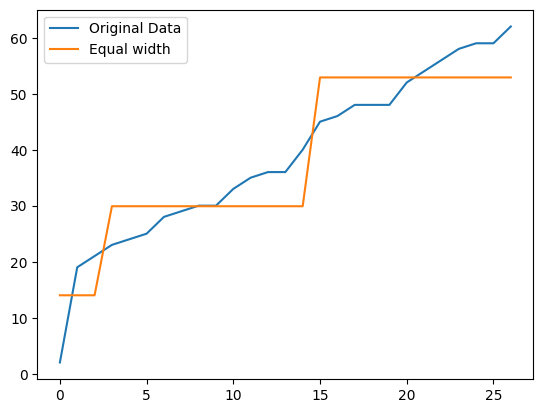

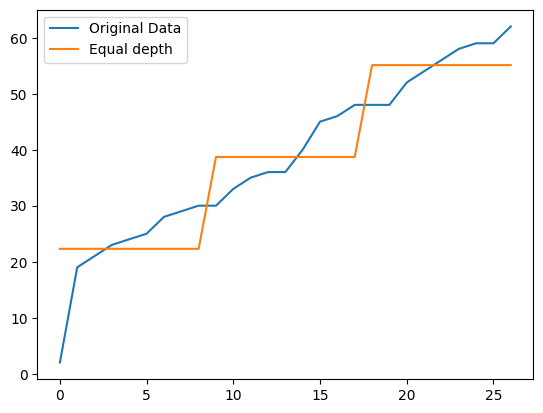

In [17]:
import matplotlib.pyplot as plt

# Given data
data1 = [2, 19, 21, 23, 24, 25, 28, 29, 30, 30, 33, 35, 36, 36, 40, 45, 46, 48, 48, 48, 52, 54, 56, 58, 59, 59, 62]
data2 = [14,14,14,29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9,52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9, 52.9]
data3 = [22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3, 22.3,38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7,55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1, 55.1]

plt.plot(data1, label="Original Data")
plt.plot(data2, label="Equal width")
plt.legend()  # This line adds the legend
plt.show()


plt.plot(data1, label="Original Data")
plt.plot(data3, label="Equal depth")
plt.legend()  # This line adds the legend
plt.show()


```
>> Equal-depth binning tends to capture the underlying patterns in the data more effectively, 
   as each bin represents a similar proportion of the dataset.

---

#### Exercise 4: Normalization

##### __(a) Which of the columns in the following table can be normalized using the linear or logarithmic min-max normalization? Discuss if the normalization is useful or not.__

|id |Gender|Size (cm)|Weight (kg)|Hair Color|Blood Type|Glasses|Salary(€)|
|---|------|---------|-----------|----------|----------|-------|------|
|22|Female|175|65|red|A|yes|3900|
|23|Female|176|71|red|AB|yes|4200|
|24|Female|176|71|red|O|yes|2800|
|25|Female|179|69|black|B|yes|5100|
|26|Female|195|62|black|B|no|3850|
|27|Female|204|64|black|O|yes|2200|
|28|Female|163|70|brown|AB|no|8000|
|29|Female|172|62|brown|AB|no|1900|
|30|Female|166|52|brown|AB|no|4450|
|31|Female|182|67|brown|AB|no|3900|
|32|Female|168|70|brown|O|yes|65000|
|33|Female|168|59|blond|B|no|450|
|34|Male|168|62|black|B|no|5100|
|35|Male|178|63|red|B|no|450|
|36|Male|178|59|red|AB|no|2900|
|37|Male|172|67|brown|A|yes|3200|
|38|Male|172|58|brown|A|no|3100|
|39|Male|185|62|brown|A|no|10500|
|40|Male|190|76|black|B|yes|2800|
|41|Male|184|70|black|B|yes|4100|

```
>> "Size", "Weight", and "Salary" can be normalized, and it's usually beneficial for two reasons:

    (1) Many machine learning algorithms are sensitive to the scale of input features.
        Normalization can help these algorithms converge faster and improve overall model performance.

    (2) The dataset contains numerical features with different scales, 
        normalization can ensure that all features contribute equally to the analysis.
```

##### __(b) Using the column “Size”, use linear min-max normalization to transform the values ``168, 182, 195`` into the range ``[0, 1]``. Give the formula used to compute the values, including min/max value.__

```
>> X normalized = (X - X min) / (X max - X min)

​   (1) for X = 168: 
            X normalized = (168 - 168) / (195 - 168) = 0

   (2) for X = 182:
            X normalized = (182 - 168) / (195 - 168) ≈ 0.5185

​   (3) for X = 195:
            X normalized = (195 - 168) / (195 - 168) = 1
​
   The linear min-max normalized values for [168, 182, 195] into the range[0, 1] are "[0, 0.5185, 1]".
```

##### __(c) Using the column “Weight”, use logarithmic min-max normalization to transform the values ``59, 63, 70`` into the range ``[0, 1]``. Give the formula used to compute the values, in-cluding min/max value__

```
>> X normalized = (log(X) - log(X min)) / (log(X max) - log(X min))
​   
    (1) for X = 59
            X normalized = (log(59) - log(59)) / (log(70) - log(59))
                         = 0

    (2) for X = 63
            X normalized = (log(63) - log(59)) / (log(70) - log(59))
                         ≈ 0.3837

    (3) for X = 70
            X normalized = (log(70) - log(59)) / (log(70) - log(59))
                         = 1
 
    The logarithmic min-max normalized values for [59, 63, 70] into the range[0, 1] are "[0, 0.3837, 1]".
```

##### __(d) Which of the two normalization methods (linear & logarithmic) would you use for the column ``salary`` if you want to use your normalized data later on for some statistical modeling? Briefly explain your choice.__

```
>> The "Salary" distribution seems to contains extreme values, and thus logarithmic min-max normalization might be more appropriate. 
   This method can help reduce the impact of extreme values and ensure a more balanced representation of salary differences.
```

##### __(e) Write a function to normalize all columns of the following dataframe using the square root min-max normalization.__

In [18]:
import pandas as pd
df_nom = pd.DataFrame(list(zip(range(0, 100) , range(750, 850), range(11122, 11222))), 
               columns =['a', 'b', 'c'])
print(df_nom)

     a    b      c
0    0  750  11122
1    1  751  11123
2    2  752  11124
3    3  753  11125
4    4  754  11126
..  ..  ...    ...
95  95  845  11217
96  96  846  11218
97  97  847  11219
98  98  848  11220
99  99  849  11221

[100 rows x 3 columns]


In [19]:
def sqrt_min_max_normalize(df):
    
    df_normalized = df.copy()

    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()

        if min_val != max_val:
            df_normalized[column] = np.sqrt((df[column] - min_val) / (max_val - min_val))
        else:
            df_normalized[column] = 0.0

    return df_normalized

df_normalized_sample = sqrt_min_max_normalize(df_nom)

print("Normalized DataFrame:")
df_normalized_sample

Normalized DataFrame:


,a,b,c
0,0.000000,0.000000,0.000000
1,0.100504,0.100504,0.100504
2,0.142134,0.142134,0.142134
3,0.174078,0.174078,0.174078
4,0.201008,0.201008,0.201008
...,...,...,...
95,0.979590,0.979590,0.979590
96,0.984732,0.984732,0.984732
97,0.989847,0.989847,0.989847
98,0.994937,0.994937,0.994937


***<span style="color:orange">Feedback: </span>***
- 1b) count is not a mathematical iperation
- 3c) limit_direction='both' is not used as default
- 4a) mean is wrong for bin2
- 4c) also one bin is very small
- 5b+c) is wrong as the colums should be used for the min and max
- 5e) can be done more easily

***<span style="color:green">Still good! Grade:green</span>***